In [4]:
%load_ext autoreload
%autoreload 2

import os
import subprocess
import sys
import warnings

warnings.simplefilter("ignore", FutureWarning)

import cnv_inference_config
project_config = cnv_inference_config
os.chdir(project_config.MB_ROOT)

from collections import defaultdict, OrderedDict
import multiprocessing as mp
import sys

import numpy as np
import pandas as pd
from tqdm import tqdm, tqdm_notebook

import matplotlib.pyplot as plt
import seaborn as sns

from data_types import ase
import plotlib
import toolkit
import util
import test_phasing
from workspace.workspace_manager import WorkspaceManager

workspace = WorkspaceManager(
    task_name="counts_to_ase",
    experiment_info={"data" : "scDNA"},
    verbose=True
)
workspace.load_workspace()

sns.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
clustering_name = 'cnv_3'
requirements = ["gene_counts"]

data = {
    dtype : 
    util.pickle_load(workspace.tmp_data[dtype])
    for dtype in tqdm_notebook(
        requirements,
        "loading datasets into RAM"
    )
}
data_name = workspace.experiment_info['data']
sample_name = workspace.experiment_info['sample']
print(f"Currently working on {data_name}, {sample_name}")

data[f"{clustering_name}_clustering"] = util.pickle_load(
    f"{workspace.dir}"
    f"/{clustering_name}_clustering.pkl"
)
data[f"{clustering_name}_clustering"].head()


Currently working on scDNA, first_sample


,LABEL,BARCODE,TSNE_1,TSNE_2
0,1,AAACCTGTCTTGCGAA-1,9.411309,2.267972
1,1,AAACGGGAGTGTTGAA-1,4.764729,3.159622
2,3,AAACGGGGTACTCACA-1,-20.151240,6.528130
3,1,AAAGCAAAGCTGGTCC-1,9.120229,-3.189401
4,1,AAAGCAAAGGCCATAG-1,1.129511,-0.906303


In [6]:
data[f'cnv_^_haplotype_block_{clustering_name}_gene_counts'] =\
    toolkit.aggregate_by_barcode_groups(
        data["gene_counts"], 
        data[f"{clustering_name}_clustering"]
    )
util.pickle_dump(
    data[f'cnv_^_haplotype_block_{clustering_name}_gene_counts'], 
    f"{workspace.tmp_dir}"
    f"/cnv_^_haplotype_block_{clustering_name}_gene_counts.pkl"
)
workspace.add_entry(
    f"cnv_^_haplotype_block_{clustering_name}_gene_counts",
    f'cnv_^_haplotype_block_{clustering_name}_gene_counts.pkl'
)
data[f'cnv_^_haplotype_block_{clustering_name}_gene_counts'].head()

,1_ad,1_dp,2_ad,2_dp,3_ad,3_dp
0,774.0,1546.0,69.0,157.0,229.0,474.0
1,1556.0,3137.0,182.0,304.0,479.0,1008.0
2,623.0,1067.0,45.0,89.0,163.0,309.0
3,44.0,74.0,0.0,1.0,18.0,26.0
4,26.0,70.0,2.0,5.0,8.0,21.0


In [7]:
data[f'cnv_^_haplotype_block_{clustering_name}_ase'] = ase.compute_ase(
    data[f'cnv_^_haplotype_block_{clustering_name}_gene_counts'], 
    toolkit.extract_cluster_labels(data[f'{clustering_name}_clustering'])
)
util.pickle_dump(
    data[f'cnv_^_haplotype_block_{clustering_name}_ase'], 
    f"{workspace.tmp_dir}"
    f"/cnv_^_haplotype_block_{clustering_name}_ase.pkl"
)
workspace.add_entry(
    f"cnv_^_haplotype_block_{clustering_name}_ase",
    f'cnv_^_haplotype_block_{clustering_name}_ase.pkl'
)

CPU times: user 28.5 s, sys: 2.16 s, total: 30.7 s
Wall time: 30.2 s


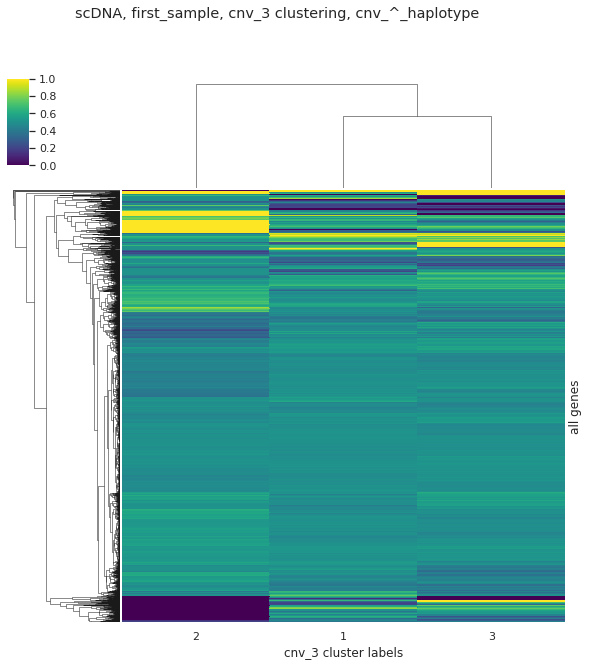

In [10]:
%%time
ase.plot_ase(
    data[f'cnv_^_haplotype_block_{clustering_name}_ase'],
    title=f"{data_name}, {sample_name}, {clustering_name}"
    f" clustering, cnv_^_haplotype",
    xlabel=f"{clustering_name} cluster labels",
    ylabel="all genes",
    row_cluster=True,
    outfile=f"{workspace.img_dir}/cnv_^_haplotype_block_{clustering_name}_ase.pdf"
)

In [9]:
workspace.status()
workspace.verify()
workspace.push()

Staged for commit: 
	-cnv_^_haplotype_block_cnv_3_gene_counts : cnv_^_haplotype_block_cnv_3_gene_counts.pkl
	-cnv_^_haplotype_block_cnv_3_ase : cnv_^_haplotype_block_cnv_3_ase.pkl


/icgc/dkfzlsdf/analysis/B260/users/v390v/cnv_inference/data/tmp/counts_to_ase/first_sample/scDNA/cnv_^_haplotype_block_cnv_3_gene_counts.pkl —> /icgc/dkfzlsdf/analysis/B260/users/v390v/cnv_inference/data/processed/first_sample/scDNA/cnv_^_haplotype_block_cnv_3_gene_counts.pkl
/icgc/dkfzlsdf/analysis/B260/users/v390v/cnv_inference/data/tmp/counts_to_ase/first_sample/scDNA/cnv_^_haplotype_block_cnv_3_ase.pkl —> /icgc/dkfzlsdf/analysis/B260/users/v390v/cnv_inference/data/processed/first_sample/scDNA/cnv_^_haplotype_block_cnv_3_ase.pkl
